In [1]:
#import required libraries 
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time 
%matplotlib inline

In [2]:
# cv2.cvtColor is an OpenCV function to convert images to different color spaces
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
#load test iamge
test1 = cv2.imread('data/OpenCVCascadedClassifier/test1.jpg')
#convert the test image to gray image as opencv face detector expects gray images 
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

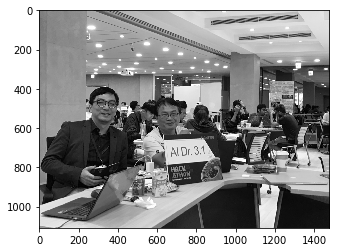

In [4]:
plt.imshow(gray_img, cmap='gray')  
 
# or display the gray image using OpenCV 
# cv2.imshow('Test Imag', gray_img) 
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

# OpenCV's CascadedClassifier 
detectMultiScale（image，scaleFactor，minNeighbors）：這是一個檢測對象的通用函數，在這種情況下，它會檢測面，因為我們調用了face cascade。
如果找到一個面，它將以“Rect（x，y，w，h）”的形式返回所述面的位置列表，如果沒有，則返回“None”。
(1)image：第一個輸入是灰度圖像。因此，請確保圖像為灰度。 
(2)scaleFactor：這個函數補償了當一個面看起來比另一個面更大時發生的錯誤感覺，因為它更接近相機。 
(3)minNeighbors：這是一種使用移動窗口來檢測對象的檢測算法，它通過在聲明找到的面部之前定義在當前對象附近找到多少個對象來實現。

In [7]:
#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('data/OpenCVCascadedClassifier/haarcascade_frontalface_alt.xml')

In [9]:
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);  

#go over list of faces and draw them as rectangles on original colored 
for (x, y, w, h) in faces:     
         cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)
        #let's detect multiscale (some images may be closer to camera than others) images 
#print the number of faces found 
print('Faces found: ', len(faces))


Faces found:  2


註解：調用 CascadeClassifier 中的調detectMultiScale函數進行多尺度檢測，多尺度檢測中會調用單尺度的方法detectSingleScale。


參數說明：

scaleFactor 是 圖像的縮放因子

minNeighbors 為每一個級聯矩形應該保留的鄰近個數，可以理解為一個人周邊有幾個人臉

minSize 是檢測窗口的大小

這些參數都是可以針對圖片進行調整的，處理結果返回一個人臉的矩形對象列表。


-----------------為每個人臉畫一個框----------

循環讀取人臉的矩形對象列表，獲得人臉矩形的坐標和寬高， 然後在原圖片中畫出該矩形框，調用的是OpenCV的rectangle 方法，其中矩形框的顏色等是可調整的。

保存檢測後的結果

萬事具備了，調用imwrite，將檢測後的結果保存到指定的位置。結果如下



原文網址：https://kknews.cc/zh-tw/other/3xkk2vg.html

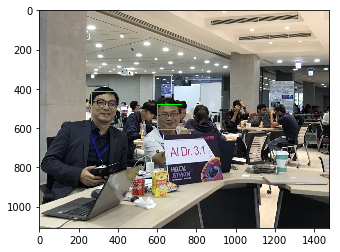

In [10]:
#convert image to RGB and show image 
plt.imshow(convertToRGB(test1))

In [11]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
 #just making a copy of image passed, so that passed image is not changed 
 img_copy = colored_img.copy()          
 
 #convert the test image to gray image as opencv face detector expects gray images
 gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          
 
 #let's detect multiscale (some images may be closer to camera than others) images
 faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);          
 
 #go over list of faces and draw them as rectangles on original colored img
 for (x, y, w, h) in faces:
      cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              
 
 return img_copy

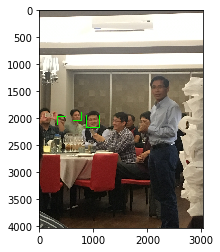

In [19]:
#load another image 
test2 = cv2.imread('data/OpenCVCascadedClassifier/test2.jpg')  
 
#call our function to detect faces 
faces_detected_img = detect_faces(haar_face_cascade, test2)  
 
#convert image to RGB and show image 
plt.imshow(convertToRGB(faces_detected_img))

# 作業: 
1. 使用faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5); 
修改 scaleFactor, minNeighbor兩個參數計算 test5.jpg 有幾張臉

2. load cascade classifier training file for haarcascade 
3. load cascade classifier training file for lbpcascade 

In [21]:
#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('data/OpenCVCascadedClassifier/haarcascade_frontalface_alt.xml') 
#load cascade classifier training file for lbpcascade 
lbp_face_cascade = cv2.CascadeClassifier('data/OpenCVCascadedClassifier/lbpcascade_frontalface.xml')  

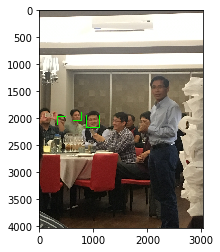

In [22]:
#load test image1 
test1 = cv2.imread('data/OpenCVCascadedClassifier/test5.jpg') 

#call our function to detect faces 
faces_detected_img = detect_faces(haar_face_cascade, test1)  
#convert image to RGB and show image 
plt.imshow(convertToRGB(faces_detected_img))

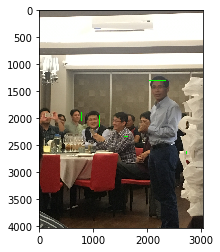

In [24]:
#load test image2 
test2 = cv2.imread('data/OpenCVCascadedClassifier/test6.jpg')

#call our function to detect faces 
faces_detected_img = detect_faces(lbp_face_cascade, test2)  
#convert image to RGB and show image 
plt.imshow(convertToRGB(faces_detected_img))